In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

from sklearn.model_selection import train_test_split
import sklearn.externals.joblib as jb


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import missingno as msno
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data=pd.read_csv('D:\Malware Detection\Ai_project_2021\data_set\data_set.csv')

In [3]:
X=data.copy()

In [4]:
X.head()

,status,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,...,Javascript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors
0,malcious,9,9,2,2,0,1,1,0,0,...,2,0,0,0,0,0,0,0,0,0
1,malcious,9,9,3,3,1,1,1,1,0,...,2,0,0,0,0,0,0,0,0,0
2,malcious,15,15,2,2,1,1,1,1,0,...,2,0,0,1,0,0,0,0,0,0
3,malcious,8,8,2,2,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
4,malcious,9,9,2,2,0,1,0,1,0,...,2,0,0,0,0,0,0,0,0,0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987 entries, 0 to 19986
Data columns (total 22 columns):
status          19987 non-null object
obj             19987 non-null object
endobj          19987 non-null object
stream          19987 non-null object
endstream       19987 non-null object
xref            19987 non-null object
trailer         19987 non-null object
startxref       19987 non-null object
Page            19987 non-null object
Encrypt         19987 non-null object
ObjStm          19987 non-null object
JS              19987 non-null object
Javascript      19987 non-null object
AA              19987 non-null object
OpenAction      19987 non-null object
AcroForm        19987 non-null object
JBIG2Decode     19987 non-null object
RichMedia       19987 non-null object
Launch          19987 non-null object
EmbeddedFile    19987 non-null object
XFA             19987 non-null object
Colors          19987 non-null object
dtypes: object(22)
memory usage: 3.4+ MB


#### we notice that there are many features we should convert them to numeric

In [6]:
X.describe()

,status,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,...,Javascript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors
count,19987,19987,19987,19987,19987,19987,19987,19987,19987,19987,...,19987,19987,19987,19987,19987,19987,19987,19987,19987,19987
unique,3,601,601,289,289,18,18,15,102,4,...,27,39,7,8,15,5,5,15,5,4
top,malcious,9,9,2,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
freq,10980,3962,3950,5497,5458,11043,12226,11461,13176,19922,...,9684,19541,11046,15441,19829,19977,19900,18268,19062,19977


#### We took a quick look on most frequent values

In [7]:
for x in X.iloc[:,1:].columns:
        X[x]=pd.to_numeric(X[x],errors='coerce')

In [8]:
X.describe()

,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,ObjStm,...,Javascript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors
count,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,...,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000,19986.000000
mean,46.638197,46.612529,15.775093,15.767337,1.219704,1.279095,1.441759,3.457720,0.004253,1.415641,...,0.808616,0.151456,0.450766,0.298859,0.022516,0.000901,0.008206,0.628890,0.046583,0.000500
std,114.223816,114.232037,35.353424,35.354490,0.922525,0.873231,0.876077,7.887528,0.079603,4.943535,...,3.417061,3.950536,0.507736,0.610143,0.369859,0.049000,0.548779,2.199603,0.213813,0.024499
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,11.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,40.000000,15.000000,15.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3146.000000,3146.000000,902.000000,902.000000,46.000000,46.000000,24.000000,198.000000,2.000000,108.000000,...,404.000000,213.000000,8.000000,6.000000,14.000000,4.000000,77.000000,17.000000,5.000000,2.000000


In [9]:
X.isna().sum()

status          0
obj             1
endobj          1
stream          1
endstream       1
xref            1
trailer         1
startxref       1
Page            1
Encrypt         1
ObjStm          1
JS              1
Javascript      1
AA              1
OpenAction      1
AcroForm        1
JBIG2Decode     1
RichMedia       1
Launch          1
EmbeddedFile    1
XFA             1
Colors          1
dtype: int64

In [10]:
X.dropna(inplace=True)

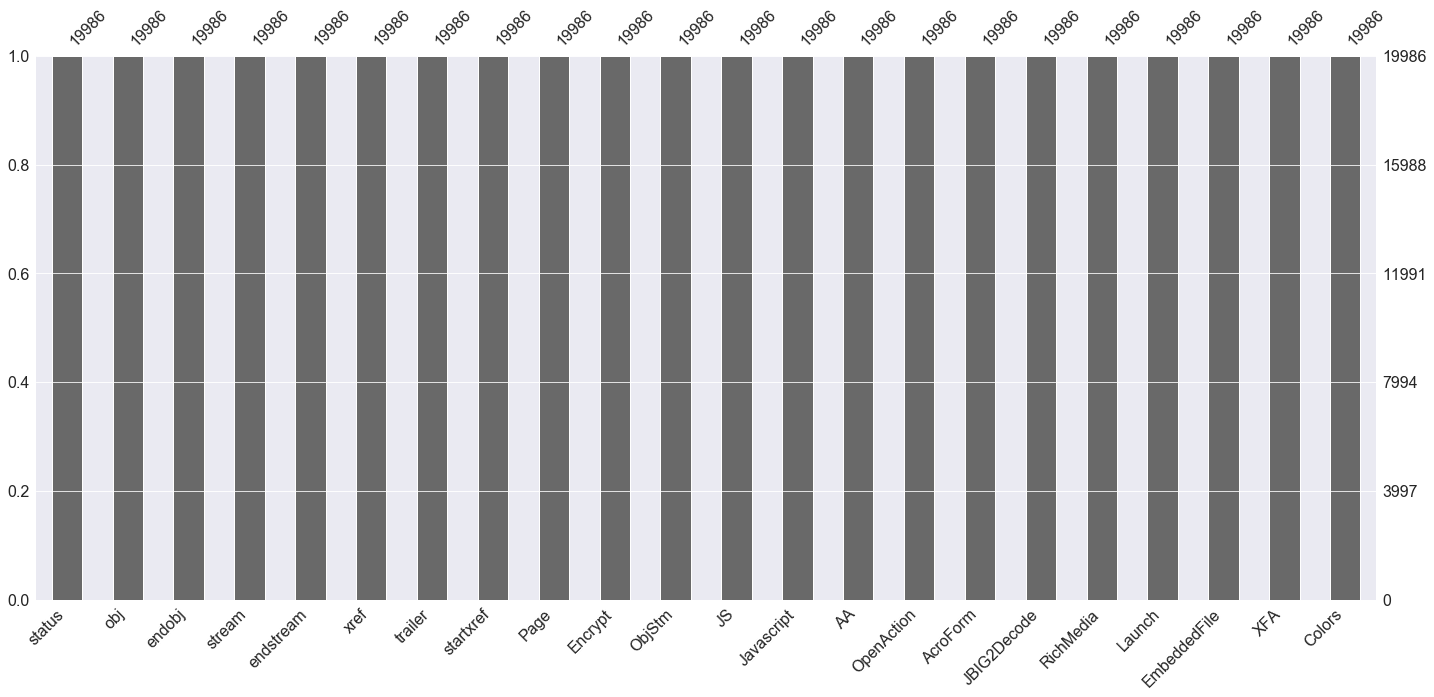

In [11]:
msno.bar(X)

## Let's go inside the Data

In [12]:
def count(col):
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    X[col].value_counts().plot.pie(autopct='%1.1f%%',shadow=True);
    
    plt.subplot(1,2,2)
    sns.countplot(X[col])
    
    plt.show()
    
def count_with_hue(col,hue):
    
    sns.countplot(x=col,data=X,hue=hue)
    
def relation_plot(col1,col2):
    sns.relplot(x=col1,y=col2,data=X,col='status',kind="scatter")

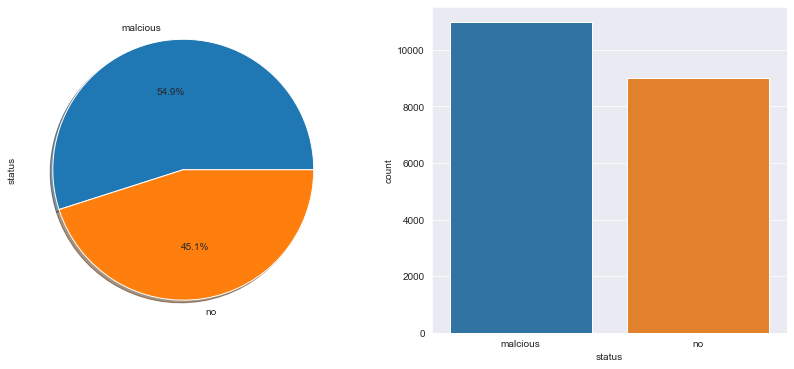

In [13]:
count('status')

#### Notice data before dropping Duplicate Values

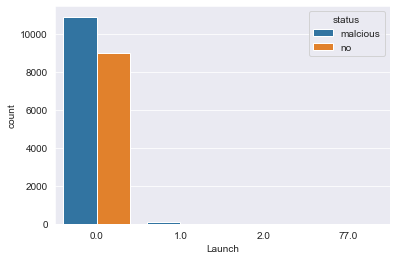

In [14]:
count_with_hue('Launch','status')

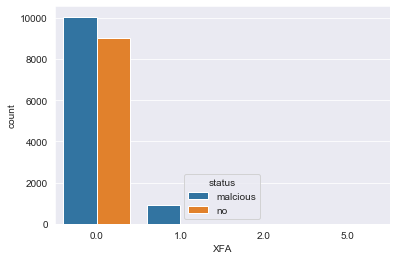

In [15]:
count_with_hue('XFA','status')

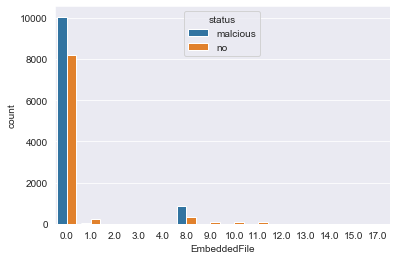

In [16]:
count_with_hue('EmbeddedFile','status')

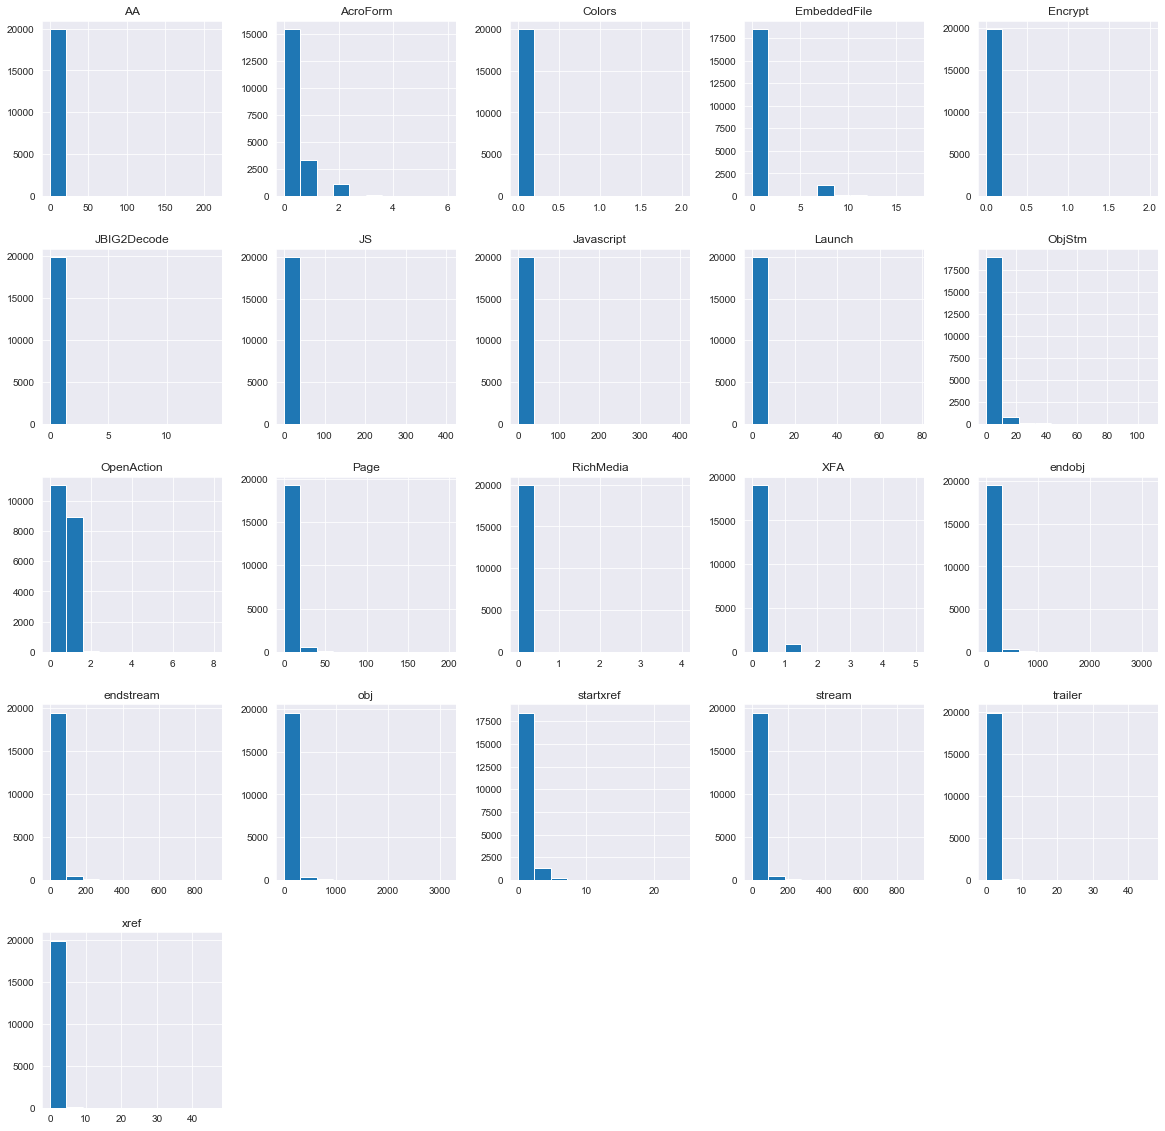

In [17]:
X.hist(bins=10 , figsize=(20,20)) 
plt.show()


#### After these visualization you should notice that Although you have several unique values but There are only almost two values repeats several times and others have  poor repeated

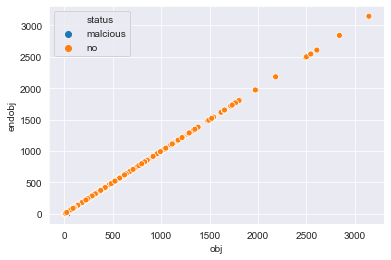

In [18]:
sns.scatterplot(x="obj",y="endobj",data=X,hue='status')

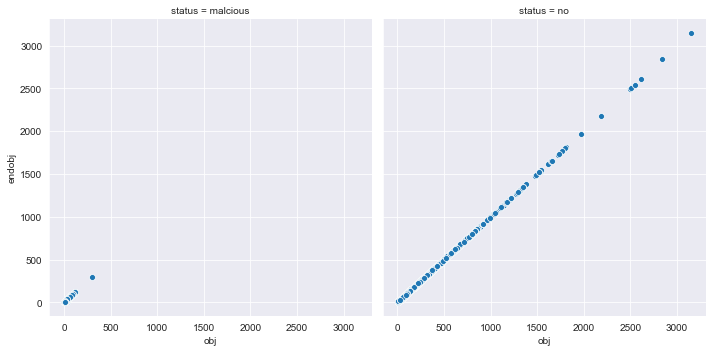

In [19]:
relation_plot('obj','endobj')

### I tried to grouped it but according to this pic grouping won't give better score

In [20]:
X.loc[X.iloc[:,1:].duplicated(),'status'].value_counts()

malcious    10705
no           3511
Name: status, dtype: int64

In [21]:
X.drop(X.loc[X.iloc[:,1:].duplicated()].index,inplace=True)

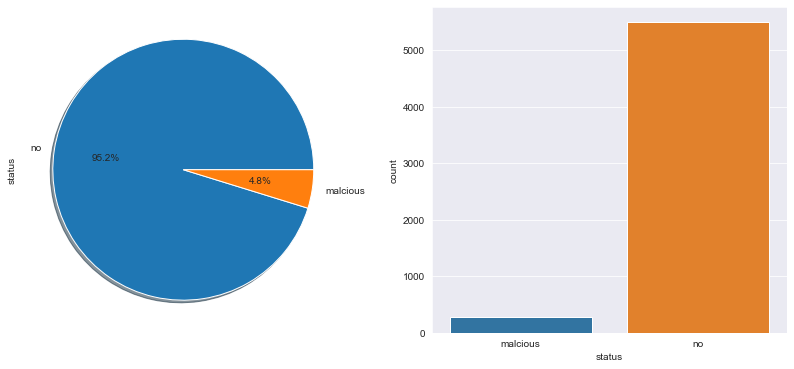

In [22]:
count('status')

### after dropping Duplicate values

In [23]:
map={'no':0,'malcious':1}
X['status'] = X['status'].replace(map)

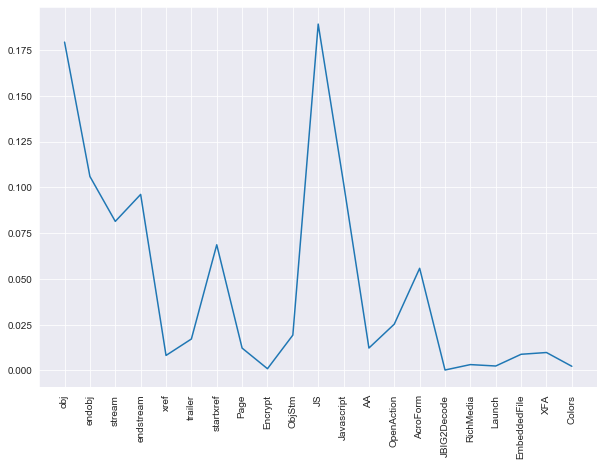

In [24]:
rf = RandomForestClassifier()
rf.fit(X.iloc[:,1:],X.iloc[:,0])

plt.figure(figsize=(10,7))

plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.iloc[:,1:].shape[1]), X.iloc[:,1:].columns.tolist(), rotation=90)
plt.show()


#### we can decriment Features into 5 only : 'obj','endobj','stream','JS','Javascript'
#### And we 'll get the same results 
#### but i have to return to my team because that will effect on input



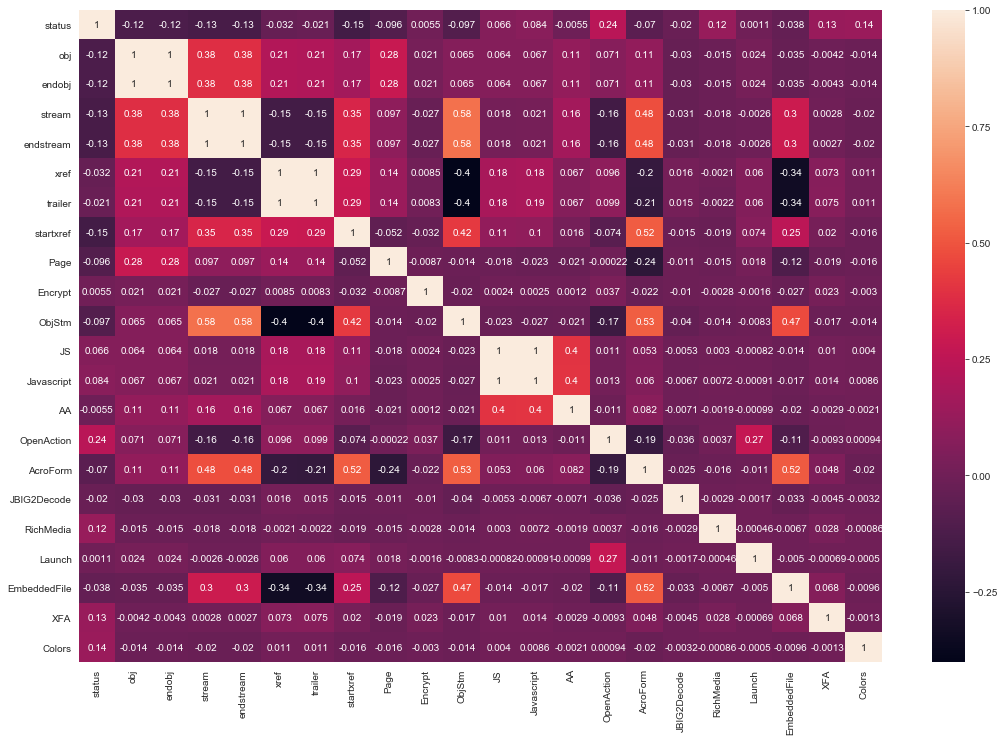

In [25]:
plt.figure(figsize=(18,12))  
p=sns.heatmap(X.corr(), annot=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,1:], X.iloc[:,0], test_size=0.1, random_state=44,shuffle =True)

In [27]:
acc_models_training=[]
acc_models_testing=[]
acc_models_Recall_Mal=[]
acc_models_Precision_Mal=[]
acc_models_Precision_secure=[]
acc_models_Recall_secure=[]


In [28]:
def precision_recall(y_test,y_pred):
    
    # precision And Recall for Malicious
    PrecisionScore = precision_score(y_test, y_pred,pos_label=1, average='binary')
    acc_models_Precision_Mal.append (PrecisionScore)
    
    RecallScore = recall_score(y_test, y_pred,pos_label=1, average='binary') 
    acc_models_Recall_Mal.append (RecallScore)
    
    # precision And Recall for Secure
    PrecisionScore = precision_score(y_test, y_pred,pos_label=0, average='binary') 
    acc_models_Precision_secure.append (PrecisionScore)
    
    RecallScore = recall_score(y_test, y_pred,pos_label=0, average='binary') 
    acc_models_Recall_secure.append (RecallScore)

    
def scores(Model):
    print('Train score is : {0}'.format(Model.score(X_train, y_train)))
    print('Test score is : {0}'.format(Model.score(X_test, y_test)))

    acc_models_training.append(Model.score(X_train, y_train))
    acc_models_testing.append(Model.score(X_test, y_test))
    
    y_pred=Model.predict(X_test)
    
    CM = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is : \n', CM)
    precision_recall(y_test,y_pred)
    
    

In [29]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
scores(LogisticRegressionModel)

Train score is : 0.9869054496437512
Test score is : 0.9930675909878682
Confusion Matrix is : 
 [[552   0]
 [  4  21]]


In [31]:
 
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=9) #criterion can be also : entropy 

RandomForestClassifierModel.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
scores(RandomForestClassifierModel)

Train score is : 0.9982668977469671
Test score is : 0.9948006932409013
Confusion Matrix is : 
 [[552   0]
 [  3  22]]


In [33]:
# Grid Search for KNN classifier

SelectedModel = KNeighborsClassifier() 

SelectedParameters = {'n_neighbors':[i for i in range(2,10)], 'weights':['distance','uniform'],'algorithm':['ball_tree','kd_tree','auto']}


GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X_test, y_test)


print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 0.9809358752166378
Best Parameters are : {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
Best Estimator is : KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')


In [34]:
KNNClassifierModel = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors= 3, weights= 'distance' )
KNNClassifierModel.fit(X_train, y_train)



KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [35]:
scores(KNNClassifierModel)

Train score is : 1.0
Test score is : 0.9861351819757366
Confusion Matrix is : 
 [[552   0]
 [  8  17]]


In [36]:
SVCModel = SVC()
SVCModel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
scores(SVCModel)

Train score is : 0.9924898902368573
Test score is : 0.9861351819757366
Confusion Matrix is : 
 [[552   0]
 [  8  17]]


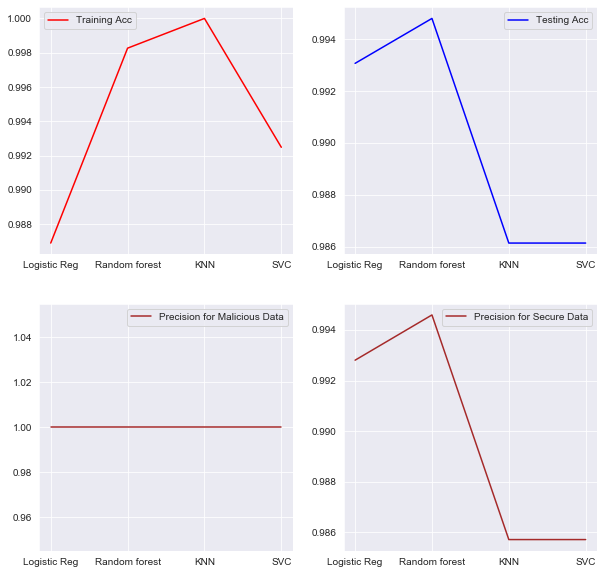

In [38]:

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(['Logistic Reg','Random forest','KNN','SVC'],acc_models_training,'r')
plt.legend(['Training Acc'])

plt.subplot(2,2,2)
plt.plot(['Logistic Reg','Random forest','KNN','SVC'],acc_models_testing,'blue')
plt.legend(['Testing Acc'])
            
plt.subplot(2,2,3)
plt.plot(['Logistic Reg','Random forest','KNN','SVC'],acc_models_Precision_Mal,'brown')
plt.legend(['Precision for Malicious Data'] ) 

plt.subplot(2,2,4)
plt.plot(['Logistic Reg','Random forest','KNN','SVC'],acc_models_Precision_secure,'brown')
plt.legend(['Precision for Secure Data'])
plt.show()



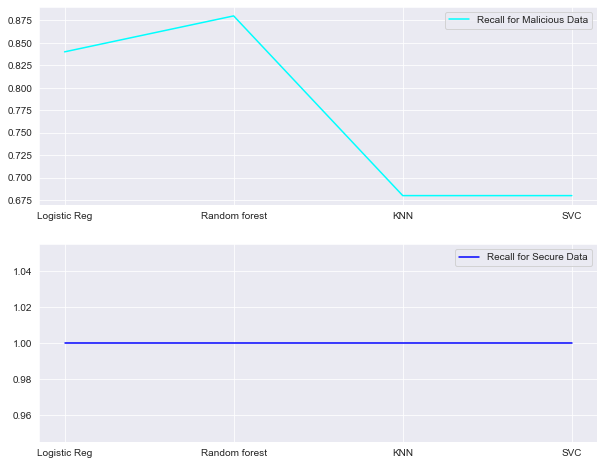

In [39]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(['Logistic Reg','Random forest','KNN','SVC'],acc_models_Recall_Mal,'cyan')
plt.legend(['Recall for Malicious Data'])

plt.subplot(2,1,2)
plt.plot(['Logistic Reg','Random forest','KNN','SVC'],acc_models_Recall_secure,'blue')
plt.legend(['Recall for Secure Data'])

plt.show()

#### As viewed All of these have training and testing accuracy over 99% but i will choose based on Recall
#### you may have observed that recall is less than others but why ? recall measurment tell us the algorithms how many malwares the alg extract from all malwares here is in random forest 88% it is very good percent based on num of malwares in this model with these low number of feature Don't forget that (you have only 200 malicious and 5000 no )



## We Saved The Model and concatenate the file saved into Extract_PDF_Run_Model

In [40]:
# It is saved Step
#jb.dump(RandomForestClassifierModel , 'saved file.sav')

In [41]:
# The 
def out_(lis):
    inp_=np.array(lis)
    inp_=inp_.reshape(-1,X.shape[1]-1)
    pred=RandomForestClassifierModel.predict(inp_)
    if pred==0 : print ("It's Secure ")
    else : print ('Malcious')    